In [2]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00


In [3]:
from faker import Faker
import pandas as pd

In [4]:
fake = Faker()
rows = int(input("How many data do you want: "))
data = {
    "Name": [fake.name() for _ in range(rows)],
    "Address": [fake.address() for _ in range(rows)],
    "Email": [fake.email() for _ in range(rows)],
    "Age": [fake.random_int(min=18, max=65) for _ in range(rows)],
    "Salary": [fake.random_int(min=15000, max=120000) for _ in range(rows)],
    "Phone": [fake.phone_number() for _ in range(rows)]
}

df = pd.DataFrame(data)
df.to_csv("kMeans_data.csv", index=False)

How many data do you want: 150


In [5]:
data = pd.read_csv("/content/kMeans_data.csv")
data.sample(5)

,Name,Address,Email,Age,Salary,Phone
93,Linda Grant,"6776 Ellis Alley Suite 821\nFrenchshire, MN 55221",melissawest@example.org,37,64592,001-532-205-6275x9449
18,Eric Taylor,"4013 Smith Drive\nSonyaborough, TN 23844",garciakathy@example.org,33,110574,(414)326-9762
44,April Phillips,"16387 Velazquez Circles Suite 018\nJamesstad, ...",eatonangela@example.org,37,96615,9214005311
146,Daniel Meza,"514 Davis Spur Apt. 620\nLake Alexfurt, WA 37600",john60@example.net,61,34038,(490)778-8894
75,Joseph Peterson,"73628 Bennett Camp\nNatalieshire, SD 95771",duncanthomas@example.com,55,104479,001-751-484-0323x8831


In [7]:
import matplotlib.pyplot as plt

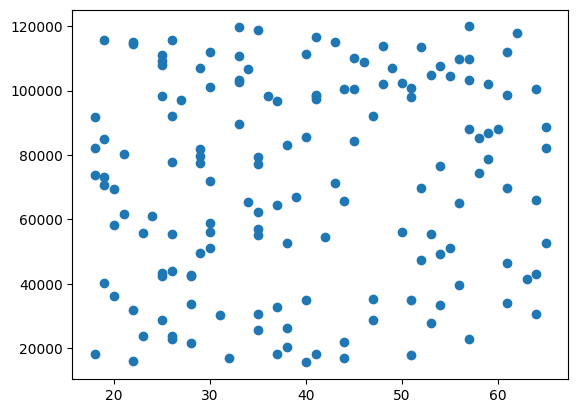

In [8]:
plt.scatter(data['Age'], data['Salary'])

In [9]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=10)
km

KMeans(n_clusters=10)

In [12]:
y_predicted = km.fit_predict(data[['Age', 'Salary']])
y_predicted

array([5, 0, 8, 0, 1, 0, 7, 9, 9, 6, 5, 5, 3, 9, 7, 9, 1, 0, 9, 9, 1, 1,
       6, 7, 4, 0, 0, 4, 9, 3, 4, 2, 3, 0, 4, 8, 0, 5, 3, 1, 2, 3, 4, 3,
       8, 6, 7, 9, 7, 5, 7, 4, 0, 3, 7, 0, 6, 5, 5, 2, 9, 9, 5, 8, 9, 6,
       3, 4, 0, 3, 1, 6, 1, 4, 6, 4, 4, 0, 3, 0, 0, 0, 7, 3, 4, 0, 1, 1,
       1, 0, 5, 0, 3, 6, 8, 0, 7, 2, 5, 1, 8, 6, 7, 2, 1, 9, 5, 4, 7, 9,
       1, 0, 8, 3, 9, 2, 3, 6, 5, 1, 7, 8, 6, 5, 2, 3, 5, 2, 3, 1, 8, 9,
       1, 6, 8, 6, 8, 2, 2, 5, 2, 8, 2, 3, 6, 4, 1, 7, 6, 8], dtype=int32)

In [13]:
data['cluster'] = y_predicted
data.head()

,Name,Address,Email,Age,Salary,Phone,cluster
0,Pamela Curry,"77117 Butler Station\nKingshire, RI 34173",nathaniel31@example.net,38,20523,+1-317-941-1951,5
1,Kyle Watts,"PSC 8224, Box 2839\nAPO AA 20013",bergerjessica@example.org,35,77325,+1-829-582-1020,0
2,Jennifer Miller,"51624 Catherine Shore\nLake Maryburgh, ND 69408",hurstdanny@example.org,41,98227,(500)352-7459x017,8
3,Andres Wilson,"39311 Marquez Stream Apt. 887\nHudsonside, VA ...",georgeray@example.net,29,77348,(281)970-5196x4426,0
4,Timothy Wilson,"3703 Wesley Tunnel Apt. 076\nSouth Desireeton,...",andrea69@example.com,47,28851,(773)741-2948x19330,1


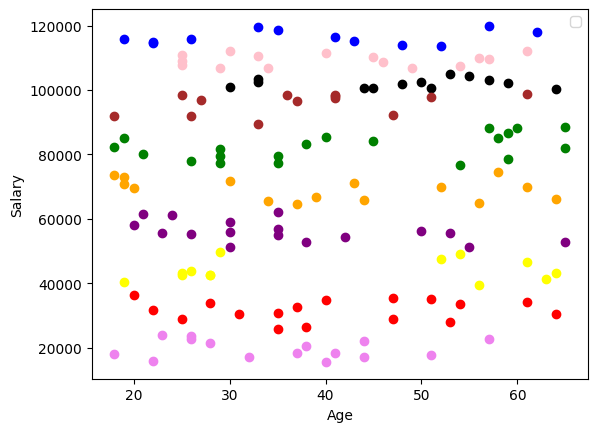

In [14]:
df1 =  data[data.cluster==0]
df2 =  data[data.cluster==1]
df3 =  data[data.cluster==2]
df4 =  data[data.cluster==3]
df5 =  data[data.cluster==4]
df6 =  data[data.cluster==5]
df7 =  data[data.cluster==6]
df8 =  data[data.cluster==7]
df9 =  data[data.cluster==8]
df10 = data[data.cluster==9]

plt.scatter(df1.Age, df1['Salary'],color='green')
plt.scatter(df2.Age, df2['Salary'],color='red')
plt.scatter(df3.Age, df3['Salary'],color='blue')
plt.scatter(df4.Age, df4['Salary'],color='purple')
plt.scatter(df5.Age, df5['Salary'],color='black')
plt.scatter(df6.Age, df6['Salary'],color='violet')
plt.scatter(df7.Age, df7['Salary'],color='orange')
plt.scatter(df8.Age, df8['Salary'],color='yellow')
plt.scatter(df9.Age, df9['Salary'],color='brown')
plt.scatter(df10.Age, df10['Salary'],color='pink')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
scaler.fit(data[['Age', 'Salary']])
data[['Age', 'Salary']] = scaler.transform(data[['Age', 'Salary']])

In [17]:
data.head()

,Name,Address,Email,Age,Salary,Phone,cluster
0,Pamela Curry,"77117 Butler Station\nKingshire, RI 34173",nathaniel31@example.net,0.425532,0.047480,+1-317-941-1951,5
1,Kyle Watts,"PSC 8224, Box 2839\nAPO AA 20013",bergerjessica@example.org,0.361702,0.591994,+1-829-582-1020,0
2,Jennifer Miller,"51624 Catherine Shore\nLake Maryburgh, ND 69408",hurstdanny@example.org,0.489362,0.792364,(500)352-7459x017,8
3,Andres Wilson,"39311 Marquez Stream Apt. 887\nHudsonside, VA ...",georgeray@example.net,0.234043,0.592214,(281)970-5196x4426,0
4,Timothy Wilson,"3703 Wesley Tunnel Apt. 076\nSouth Desireeton,...",andrea69@example.com,0.617021,0.127314,(773)741-2948x19330,1


In [18]:
km = KMeans(n_clusters=10)
km

KMeans(n_clusters=10)

In [22]:
y_predicted = km.fit_predict(data[['Age', 'Salary']])
y_predicted

array([2, 7, 4, 1, 2, 9, 5, 3, 8, 0, 2, 2, 7, 3, 6, 8, 2, 0, 4, 8, 6, 2,
       0, 5, 4, 0, 9, 4, 3, 7, 4, 3, 9, 1, 4, 3, 9, 2, 6, 6, 8, 5, 3, 9,
       4, 7, 6, 8, 6, 6, 5, 3, 7, 9, 5, 0, 0, 2, 6, 4, 3, 4, 2, 8, 8, 9,
       7, 3, 7, 5, 5, 7, 6, 8, 9, 3, 3, 0, 5, 0, 1, 0, 6, 9, 3, 0, 2, 6,
       6, 7, 5, 1, 6, 7, 3, 0, 5, 4, 5, 5, 4, 0, 5, 4, 5, 4, 2, 3, 6, 4,
       5, 1, 1, 7, 4, 4, 7, 0, 6, 2, 6, 9, 1, 6, 3, 7, 6, 8, 7, 5, 4, 3,
       2, 9, 1, 7, 4, 8, 3, 6, 8, 3, 3, 5, 9, 3, 5, 6, 7, 8], dtype=int32)

In [23]:
data['cluster'] = y_predicted
data.head()

,Name,Address,Email,Age,Salary,Phone,cluster
0,Pamela Curry,"77117 Butler Station\nKingshire, RI 34173",nathaniel31@example.net,0.425532,0.047480,+1-317-941-1951,2
1,Kyle Watts,"PSC 8224, Box 2839\nAPO AA 20013",bergerjessica@example.org,0.361702,0.591994,+1-829-582-1020,7
2,Jennifer Miller,"51624 Catherine Shore\nLake Maryburgh, ND 69408",hurstdanny@example.org,0.489362,0.792364,(500)352-7459x017,4
3,Andres Wilson,"39311 Marquez Stream Apt. 887\nHudsonside, VA ...",georgeray@example.net,0.234043,0.592214,(281)970-5196x4426,1
4,Timothy Wilson,"3703 Wesley Tunnel Apt. 076\nSouth Desireeton,...",andrea69@example.com,0.617021,0.127314,(773)741-2948x19330,2


In [25]:
km.cluster_centers_

array([[0.87397709, 0.60237176],
       [0.24734043, 0.62907053],
       [0.44844517, 0.07776961],
       [0.7787234 , 0.86700442],
       [0.44562648, 0.86993864],
       [0.81205674, 0.23392959],
       [0.15425532, 0.18537918],
       [0.41489362, 0.48610485],
       [0.15780142, 0.8925966 ],
       [0.04255319, 0.54021716]])

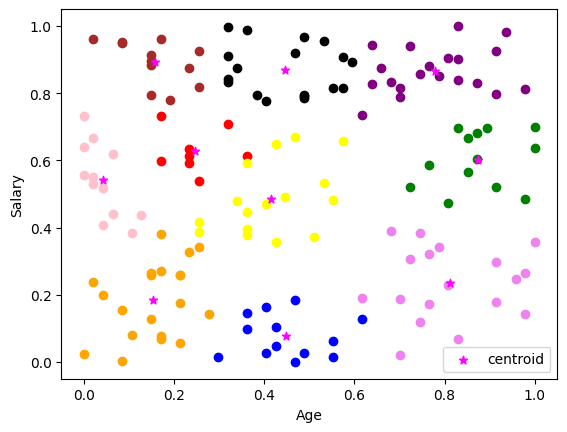

In [28]:
df1 =  data[data.cluster==0]
df2 =  data[data.cluster==1]
df3 =  data[data.cluster==2]
df4 =  data[data.cluster==3]
df5 =  data[data.cluster==4]
df6 =  data[data.cluster==5]
df7 =  data[data.cluster==6]
df8 =  data[data.cluster==7]
df9 =  data[data.cluster==8]
df10 = data[data.cluster==9]

plt.scatter(df1.Age, df1['Salary'],color='green')
plt.scatter(df2.Age, df2['Salary'],color='red')
plt.scatter(df3.Age, df3['Salary'],color='blue')
plt.scatter(df4.Age, df4['Salary'],color='purple')
plt.scatter(df5.Age, df5['Salary'],color='black')
plt.scatter(df6.Age, df6['Salary'],color='violet')
plt.scatter(df7.Age, df7['Salary'],color='orange')
plt.scatter(df8.Age, df8['Salary'],color='yellow')
plt.scatter(df9.Age, df9['Salary'],color='brown')
plt.scatter(df10.Age, df10['Salary'],color='pink')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'magenta', marker = '*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [31]:
k_rng = range(1,15)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(data[['Age', 'Salary']])
  sse.append(km.inertia_)

In [32]:
sse

[26.952849560200573,
 16.09329600874744,
 10.621823645959827,
 6.279492658527612,
 5.176961864411322,
 4.39494282418842,
 3.5772443980464415,
 2.8637691569294836,
 2.585202945717068,
 2.4871155929429927,
 2.0387183531657924,
 1.8302172101382292,
 1.5609859084323308,
 1.5375841025485084]

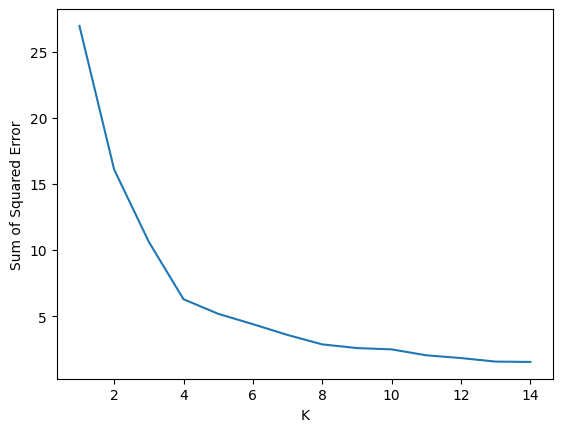

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)